In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from tabulate import tabulate

In [2]:
n_by_l = 600/(232*0.001)

In [3]:
am_to_gauss = 0.012566370614359172

In [4]:
%matplotlib qt

In [5]:
%matplotlib inline

# hysteresis curve

In [6]:
data = np.genfromtxt('data/hysteresis.csv', delimiter=',')
i = np.array([row[0] for row in data])
b = np.array([row[1] for row in data])
h = n_by_l*i

Saturation: 3650 Gauss
Remanence/Retentivity: 570 Gauss
Coercivity: -516 A/m = -6.484247237009333 Gauss


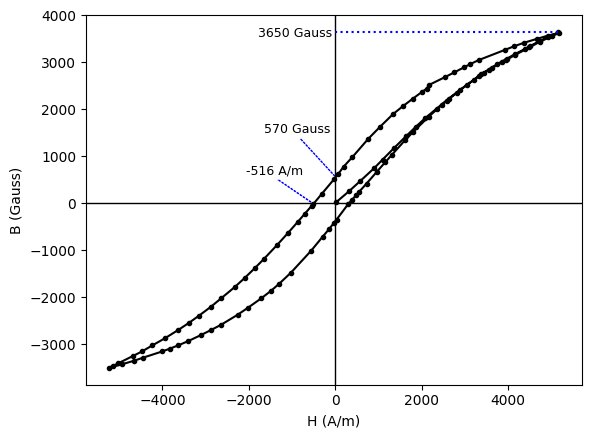

In [7]:
plt.plot(h, b, '.k-')
plt.axvline(linewidth=1, color='black')
plt.axhline(linewidth=1, color='black')

plt.xlabel('H (A/m)')
plt.ylabel('B (Gauss)')

x1, saturation = 5180, 3650
plt.plot([0, x1], [saturation, saturation], 'b:')
plt.text(-1790, saturation-100, f'{saturation} Gauss', size=9)

remanence = 570
plt.arrow(0, remanence, -800, 800, color='b', linestyle=':')
plt.text(-1660, 1500, f'{remanence} Gauss', size=9)

c1 = -516
plt.arrow(c1, 0, -800, 500, color='b', linestyle=':')
plt.text(-2070, 620, f'{c1} A/m', size=9)

print(f'Saturation: {saturation} Gauss')
print(f'Remanence/Retentivity: {remanence} Gauss')
print(f'Coercivity: {c1} A/m = {c1*am_to_gauss} Gauss')

In [11]:
empty = np.array(['', ''])
i2 = np.concatenate((np.round(i,3), empty))
h2 = np.concatenate((np.round(h,2), empty))
b2 = np.concatenate((np.round(b,0), empty))
k = int(i2.shape[0]/4)
table_h = np.array([i2[:k], h2[:k], b2[:k], i2[k:k*2], h2[k:k*2], b2[k:k*2], i2[k*2:k*3], h2[k*2:k*3], b2[k*2:k*3], i2[k*3:], h2[k*3:], b2[k*3:]]).transpose()
print(tabulate(table_h, tablefmt="latex"))

\begin{tabular}{rrrrrrrrrlll}
\hline
 0.007 &   18.1  &   25 &  1.065 &  2754.31 &  2790 & -1.404 & -3631.03 & -2690 & 0.116 & 300.0   & -11.0  \\
 0.123 &  318.1  &  260 &  0.983 &  2542.24 &  2690 & -1.525 & -3943.97 & -2870 & 0.146 & 377.59  & 70.0   \\
 0.219 &  566.38 &  468 &  0.837 &  2164.66 &  2520 & -1.637 & -4233.62 & -3020 & 0.187 & 483.62  & 176.0  \\
 0.345 &  892.24 &  745 &  0.817 &  2112.93 &  2440 & -1.73  & -4474.14 & -3150 & 0.215 & 556.03  & 253.0  \\
 0.424 & 1096.55 &  935 &  0.779 &  2014.66 &  2380 & -1.806 & -4670.69 & -3240 & 0.28  & 724.14  & 424.0  \\
 0.522 & 1350    & 1171 &  0.694 &  1794.83 &  2230 & -1.941 & -5019.83 & -3400 & 0.37  & 956.9   & 670.0  \\
 0.632 & 1634.48 & 1429 &  0.605 &  1564.66 &  2070 & -1.985 & -5133.62 & -3450 & 0.445 & 1150.86 & 873.0  \\
 0.723 & 1869.83 & 1637 &  0.516 &  1334.48 &  1900 & -2.029 & -5247.41 & -3500 & 0.505 & 1306.03 & 1032.0 \\
 0.807 & 2087.07 & 1822 &  0.4   &  1034.48 &  1630 & -1.906 & -4929.31 & -3420 & 0

# degaussing

In [8]:
data_degauss = np.genfromtxt('data/degaussing.csv', delimiter=',')[:-1]
i_ = np.array([row[0] for row in data_degauss])
b_ = np.array([row[1] for row in data_degauss])
br = np.array([row[2] for row in data_degauss])

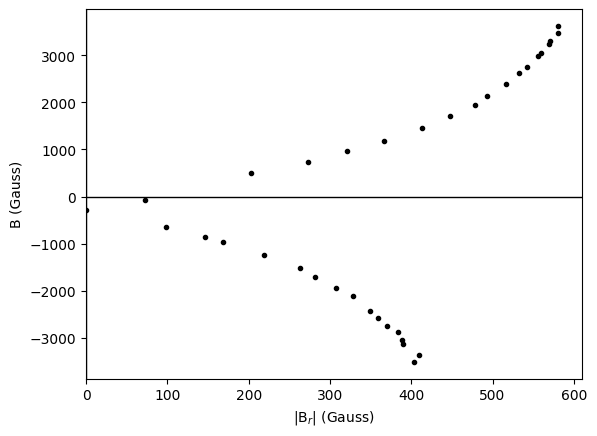

In [15]:
plt.plot(np.abs(br), b_, '.k')

plt.gca().set_xlim(left=0)

plt.xlabel('|B$_r$| (Gauss)')
plt.ylabel('B (Gauss)')

plt.axvline(linewidth=1, color='black')
plt.axhline(linewidth=1, color='black')

In [14]:
i2_ = np.concatenate((i_, np.array([''])))
b2_ = np.concatenate((b_, np.array([''])))
br2 = np.concatenate((br, np.array([''])))
m = int(i2_.shape[0]/2)
table_d = np.array([i2_[:m], b2_[:m], br2[:m], i2_[m:], b2_[m:], br2[m:]]).transpose()
print(tabulate(table_d, tablefmt="latex"))

\begin{tabular}{rrrlll}
\hline
  1.953 &  3620 &  581 & -0.945 & -1940.0 & -308.0 \\
 -2.03  & -3510 & -403 & 0.947  & 2130.0  & 493.0  \\
 -1.868 & -3360 & -410 & -0.828 & -1702.0 & -282.0 \\
  1.826 &  3480 &  580 & 0.834  & 1949.0  & 479.0  \\
 -1.708 & -3140 & -390 & -0.741 & -1512.0 & -263.0 \\
  1.711 &  3310 &  571 & 0.742  & 1715.0  & 448.0  \\
 -1.624 & -3050 & -389 & -0.622 & -1245.0 & -219.0 \\
  1.627 &  3230 &  569 & 0.624  & 1453.0  & 413.0  \\
 -1.508 & -2870 & -384 & -0.504 & -964.0  & -169.0 \\
  1.509 &  3050 &  560 & 0.505  & 1177.0  & 367.0  \\
 -1.42  & -2740 & -370 & -0.46  & -855.0  & -146.0 \\
  1.467 &  2990 &  556 & 0.415  & 958.0   & 321.0  \\
 -1.305 & -2570 & -359 & -0.37  & -640.0  & -98.0  \\
  1.308 &  2750 &  542 & 0.326  & 736.0   & 273.0  \\
 -1.22  & -2430 & -349 & -0.221 & -279.0  & 0.0    \\
  1.224 &  2620 &  533 & 0.221  & 492.0   & 203.0  \\
 -1.017 & -2120 & -328 & -0.131 & -76.0   & 72.0   \\
  1.08  &  2380 &  516 &        &         &        